In [3]:
import pandas as pd
import numpy as np
#görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [4]:
data = pd.read_csv("StudentsPerformance.csv")

In [5]:
data.shape

(1000, 8)

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Kategorik verilerdeki birbirinden farklı olan verilerin sayısı

In [8]:
data.select_dtypes("object").nunique() # gender 2 çıkma sebebi male ve female olması gibi

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

## Eksik verilerin yüzde kaçlık bölümü kapsadığını görelim

In [9]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns # Hiç eksik verimizin olmadığını gördük
percentage_of_missing_data

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

## Matematik puanlarıyla diğer verilerin ilişkisi

C:\Users\Kaan Aksoy\AppData\Local\Programs\Python\Python311\Lib\site-packages\dabl\preprocessing.py:167: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
C:\Users\Kaan Aksoy\AppData\Local\Programs\Python\Python311\Lib\site-packages\dabl\preprocessing.py:167: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.42E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.16E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=2.25E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=8.58E-03'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=5.39E-03'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

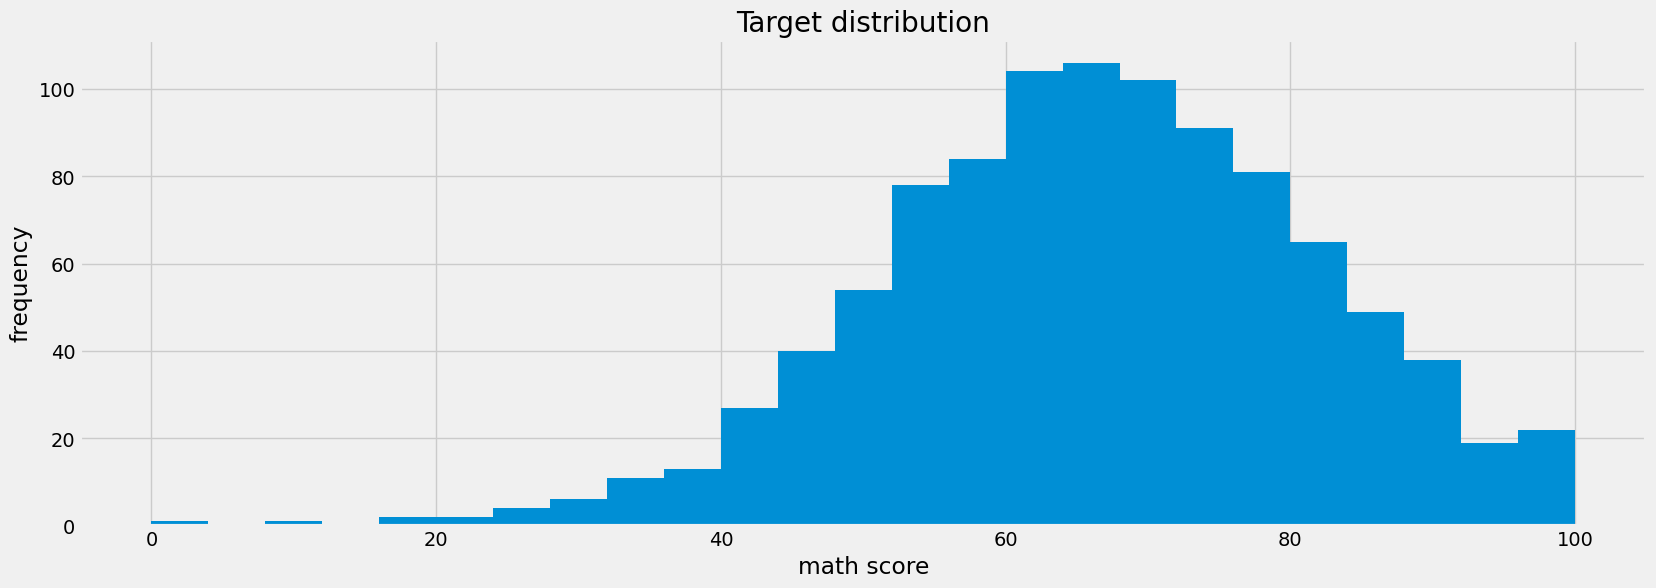

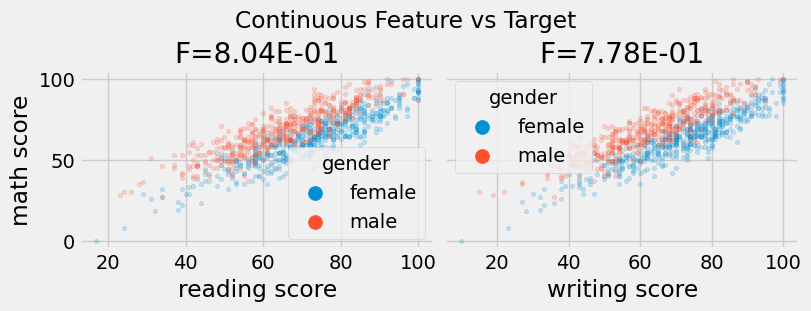

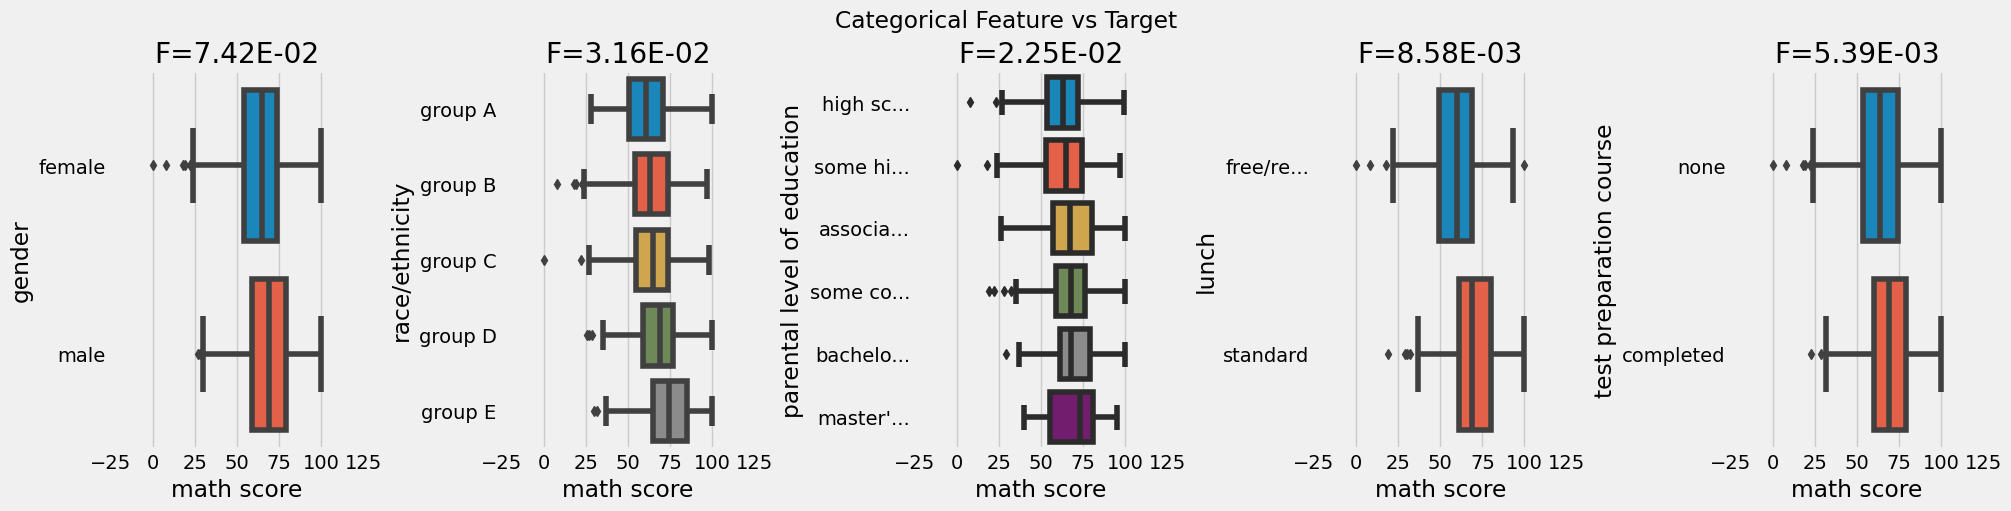

In [10]:
plt.rcParams["figure.figsize"] = (18,6)
plt.style.use("fivethirtyeight")
dabl.plot(data, target_col="math score")

## Veri Görselleştirme

Text(0, 0.5, 'Sayı')

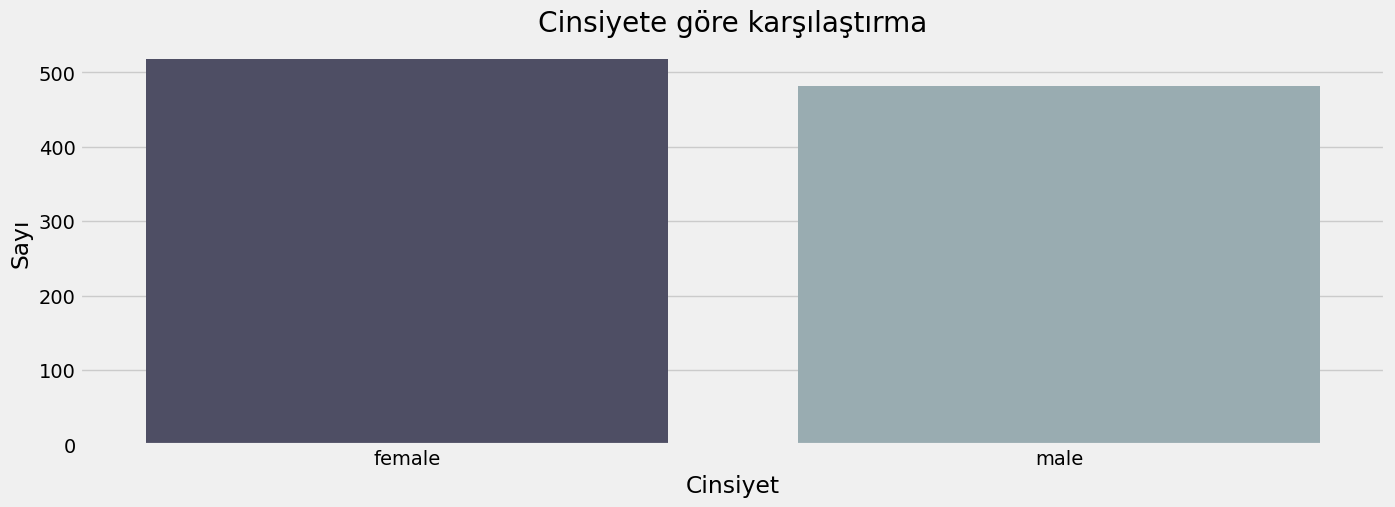

In [11]:
plt.rcParams["figure.figsize"]=(15,5)
sns.countplot(x = data["gender"], palette="bone")
plt.title("Cinsiyete göre karşılaştırma", fontweight=25)
plt.xlabel("Cinsiyet")
plt.ylabel("Sayı")

Text(0, 0.5, 'Sayılar')

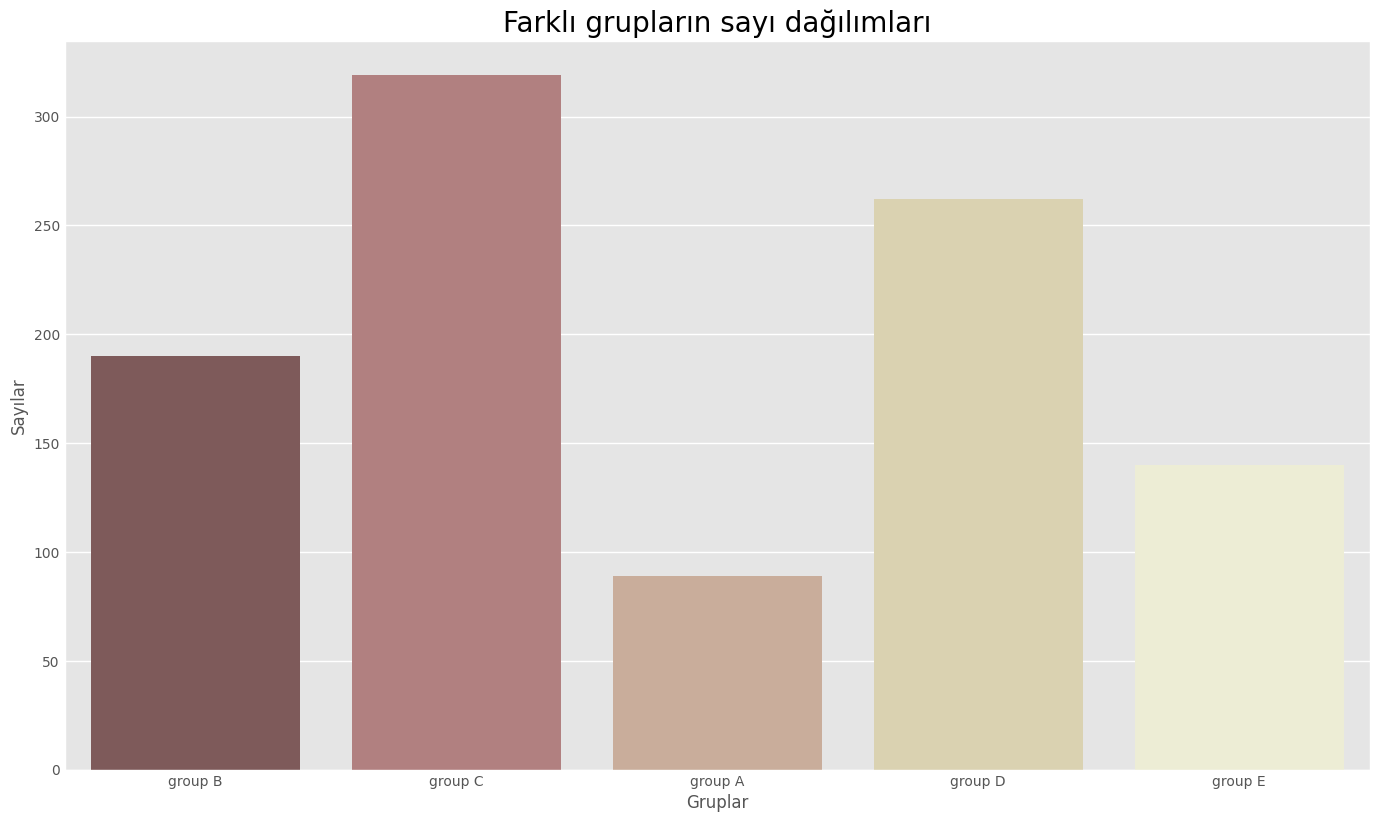

In [12]:
plt.rcParams["figure.figsize"]=(15,9)
plt.style.use("ggplot")
sns.countplot(x = data["race/ethnicity"], palette="pink")
plt.title("Farklı grupların sayı dağılımları", fontweight=30, fontsize=20)
plt.xlabel("Gruplar")
plt.ylabel("Sayılar")

## Anne-baba eğitim durumunun miktarsal grafiği -Hoca kendiniz yaparsınız dedi

## Makine öğrenmesi için öğrencilerin toplam skor değerleri

Text(0, 0.5, 'Sayıları')

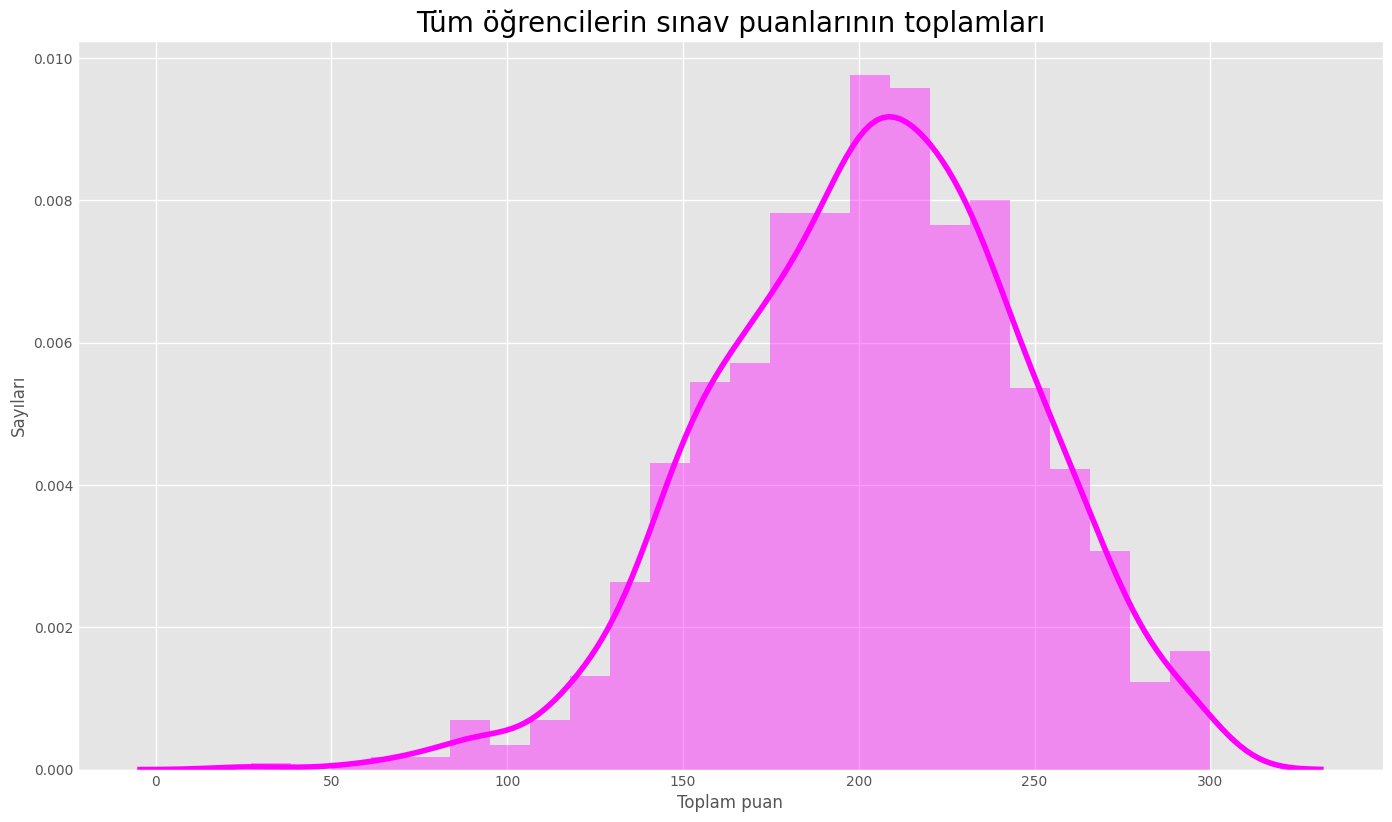

In [13]:
import warnings
warnings.filterwarnings("ignore")
#öğrencilerin notlarının toplamı
data["total_score"] = data["math score"] + data["reading score"] + data["writing score"]
#görselleştirme
sns.distplot(data["total_score"], color="magenta")
plt.title("Tüm öğrencilerin sınav puanlarının toplamları", fontweight=30, fontsize=20)
plt.xlabel("Toplam puan")
plt.ylabel("Sayıları")

## Öğrencilerin her biri için hesaplama yüzdesi

Text(0, 0.5, 'Sayı')

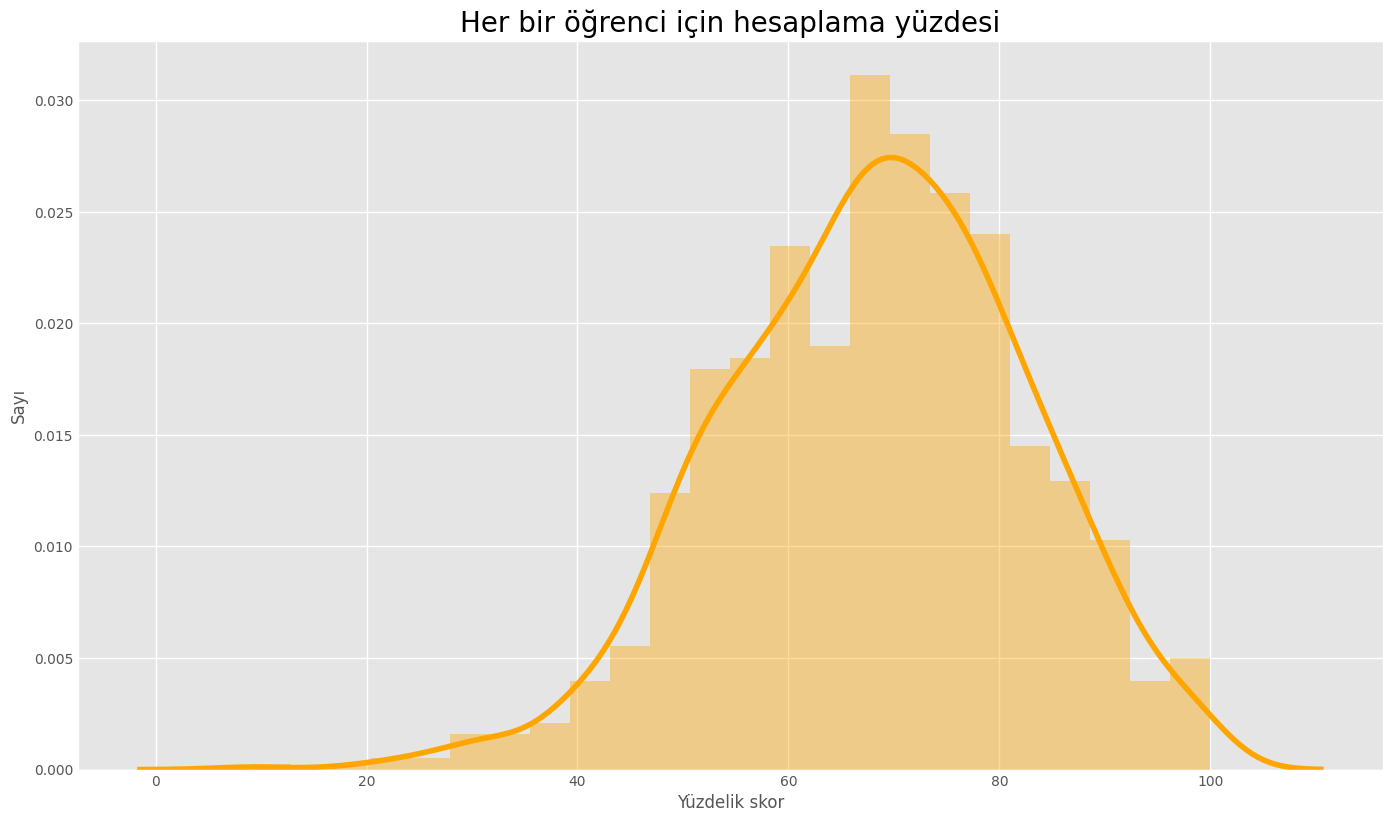

In [14]:
from math import *
import warnings
warnings.filterwarnings("ignore")
# yüzdelik sütunu oluşturma
data["percentage"] = data["total_score"]/3
# total score grafiğindeki sayılar bindelik değerler olduğu için aralığımız 0-1000 olarak belirlendi
for i in range(0,1000):
    data["percentage"][i] = ceil(data["percentage"][i]) # ceil = tavan anlamına gelir. Verilen sayıyı en yakın büyük sayıya yuvarlar
plt.rcParams["figure.figsize"] = (15,9)
sns.distplot(x=data["percentage"], color="orange")
plt.title("Her bir öğrenci için hesaplama yüzdesi", fontweight=30, fontsize=20)
plt.xlabel("Yüzdelik skor")
plt.ylabel("Sayı")

In [15]:
data["status"] = {
    "E": range(0,40),
    "D": range(41,60),
    "C": range(61,70),
    "B": range(71,80),
    "A": range(81,90),
    "A+": range(91,100)
}

# 0-40: E notu
# 41-60: D notu
# 61-70: C notu
# 71-80: B notu
# 81-90: A notu
# 91-100: A+ notu

In [17]:
def getgrade(percentage, status):
    if status == "Fail":
        return "E"
    if(percentage >= 90):
        return "A+"
    if(percentage >= 80):
        return "A"
    if(percentage >= 70):
        return "B"
    if(percentage >= 60):
        return "C"
    if(percentage >= 40):
        return "D"
    else:
        return "E"
data["grades"] = data.apply(lambda x : getgrade(x["percentage"], x["status"]), axis=1)
data["grades"].value_counts()

grades
B     260
C     252
D     248
A     156
A+     58
E      26
Name: count, dtype: int64

## Etiketli Verilerle Çalışma

In [18]:
from sklearn.preprocessing import LabelEncoder
# encoder oluşturma
le = LabelEncoder()
# test preparation course etiketleme(le.) -- fit_transform = veriyi uygun formata dönüştürüyor.
# test preparation course ve lunch içinde 2 farklı seçenek var
data["test preparation course"] = le.fit_transform(data["test preparation course"])
data["lunch"] = le.fit_transform(data["lunch"])
# etnik köken sütunundaki verilerin her birini etiketleme
# race/ethnicity içinde 5 farklı seçenek var
data["race/ethnicity"] = data["race/ethnicity"].replace("group A", 1)
data["race/ethnicity"] = data["race/ethnicity"].replace("group B", 2)
data["race/ethnicity"] = data["race/ethnicity"].replace("group C", 3)
data["race/ethnicity"] = data["race/ethnicity"].replace("group D", 4)
data["race/ethnicity"] = data["race/ethnicity"].replace("group E", 5)
# anne baba eğitim durumunu etiketleme
data["parental level of education"] = le.fit_transform(data["parental level of education"])
# cinsiyet etiketleme
data["gender"] = le.fit_transform(data["gender"])
# ders notlarını etiketleme
data["math score"] = le.fit_transform(data["math score"])
data["reading score"] = le.fit_transform(data["reading score"])
data["writing score"] = le.fit_transform(data["writing score"])
# yeni bir etiketli veri oluşturup "DURUM" etiketi oluşturma
data["status"] = le.fit_transform(data["status"])

## Verileri Hazırlama

In [21]:
x = data.iloc[:,:11]
y = data.iloc[:,11]

print(x.shape)
print(y.shape)

(1000, 11)
(1000,)


## Veri setini eğitim ve test setlerine ayırma

In [22]:
from sklearn.model_selection import train_test_split

# random_state herhangi bir tamsayı olabilir
# random_state belirlenmediği durumda program her çalıştığında farklı eğitim ve test setleri oluşur.
# veri setinin boyutu, yapısal özellikleri ve model tipine göre random_state değişebilir.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=45) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 11)
(750,)
(250, 11)
(250,)


### Ölçek belirleyip bu ölçeği bağımsız değişkenlerle besleme 

In [24]:
from sklearn.preprocessing import MinMaxScaler

# scaler oluşturma
mm = MinMaxScaler()
# ölçeği bağımsız değişkenlerle besleme
x_train = mm.fit_transform(x_train) # fit_transfrom'da hem ön işlemede hem de dönüştürmede kullanabiliyoruz 
x_test = mm.transform(x_test) # transformda önceden gelişmiş bir veri varsa fit_transform kullanmamıza gerek kalmaz. Yukarda test_size =0.25 olarak belirlediğimiz için sadece transform kullanmak yeterli. Sen testi daha önceden biliyorsun fit_transorma gerek yok diyoruz

### PCA (Principle Component Analysis)(Temel Bileşen Analizi)

In [103]:
from sklearn.decomposition import PCA

# PCA modeli oluşturma

pca = PCA(n_components = None)

# bağımsız değişkenleri(x) PCA modeline besleme

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# en yüksek çeşitliliği açıklayabilecek pca görselleştirme

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

## PCA modeli oluşturma

pca = PCA(n_components = 2) # train ve test olduğu için 2 dedik

# bağımsız değişkenleri PCA modeline besleme

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[0.53996548 0.46003452]


## Modelleme

### LOGISTIC REGRESSION

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# modeli eğitme

model.fit(x_train, y_train)

# test setinin sonuçlarını tahmin etme

y_pred = model.predict(x_test)

# sınıflandırmanın doğruluk testi

print("Eğitim setinin doğruluk oranı : ", model.score(x_train, y_train))
print("Test setinin doğruluk oranı : ", model.score(x_test, y_test))

Eğitim setinin doğruluk oranı :  0.36666666666666664
Test setinin doğruluk oranı :  0.408


## Confusion Matrix (Hata Matriksi)

Text(0.5, 1.0, 'Logistic Regression için Confusion Matrisi')

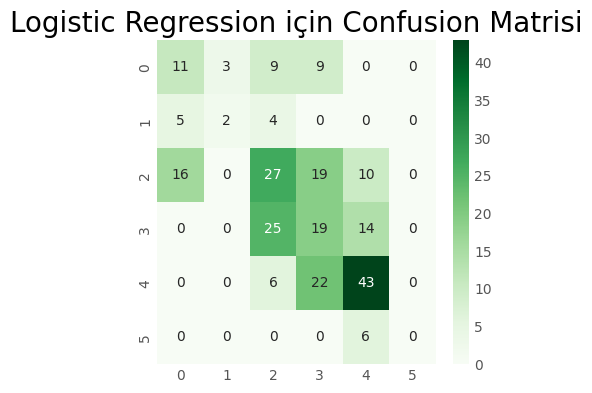

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams["figure.figsize"] = (4,4)
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Logistic Regression için Confusion Matrisi", fontweight=30, fontsize=20)

## RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Model oluşturma

model = RandomForestClassifier()

# modeli eğitme

model.fit(x_train, y_train)

# test setinin sonuçlarını tahmin etme

y_pred = model.predict(x_test)

# sınıflandırmanın doğruluk testi

print("Train Doğruluk oranı :", model.score(x_train, y_train))
print("Test Doğruluk oranı :", model.score(x_test, y_test))

Train Doğruluk oranı : 1.0
Test Doğruluk oranı : 0.828


Text(0.5, 1.0, 'Random Forest için Confusion Matrisi')

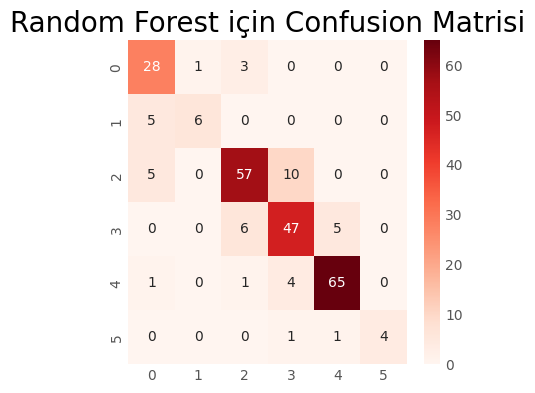

In [111]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams["figure.figsize"] = (4,4)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Random Forest için Confusion Matrisi", fontweight=30, fontsize=20)

Text(0.5, 1.0, 'Hedef Dağılımı için Radial Görüntüleme')

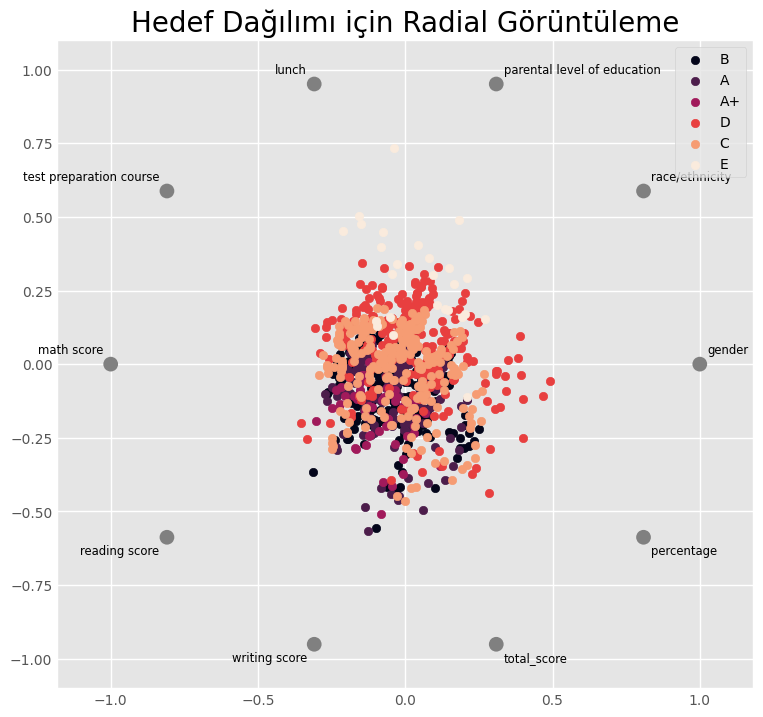

In [114]:
from pandas.plotting import radviz #radial visualization

fig,ax = plt.subplots(figsize=(8,8))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title("Hedef Dağılımı için Radial Görüntüleme", fontsize=20)